# Assignment 2: Web API and Data Storage

In this homework, you will work closely with data from a popular game called Dota 2. Here is an excerpt from wikipedia about the game. 


>Dota 2 is a free-to-play multiplayer online battle arena (MOBA) video game developed and published by Valve Corporation. The game is the stand-alone sequel to Defense of the Ancients (DotA), which was a community-created mod for Blizzard Entertainment's Warcraft III: Reign of Chaos and its expansion pack, The Frozen Throne. Dota 2 is played in matches between two teams that consist of five players, with both teams occupying their own separate base on the map. Each of the ten players independently control a powerful character, known as a "hero", that each feature unique abilities and different styles of play. During a match, a player and their team collects experience points and items for their heroes in order to fight through the opposing team's defenses. A team wins by being the first to destroy a large structure located in the opposing team's base, called the "Ancient".



## Part 1: Accessing the data

First you will need to get an API key from Valve from here https://steamcommunity.com/dev/apikey. Once you have gotten an API key, you can start requesting data. I recommend using a Python wrapper for it https://dota2api.readthedocs.io/en/latest/index.html. Follow the installation guide on the page. To test your installation, try running the following code.

```python
import dota2api
apikey = ""
api = dota2api.Initialise(apikey)
match = api.get_match_details(match_id=1000193456)
```

In [2]:
%matplotlib inline

import matplotlib
matplotlib.style.use('ggplot')
import time
import numpy as np
import pickle
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
# Fill code here

import dota2api
from pprint import pprint

apikey = 'DDEA4C7247D574FC00BC27695FF4F36F'
api = dota2api.Initialise(apikey)
match = api.get_match_details(match_id=1000193456)
pprint(match)
# Key= 'DDEA4C7247D574FC00BC27695FF4F36F'
# Domain_Name= 'boss2bmj'

{u'barracks_status_dire': 63,
 u'barracks_status_radiant': 63,
 u'cluster': 133,
 'cluster_name': u'Europe West',
 u'dire_captain': 87278757,
 u'dire_logo': 543025270456493033,
 u'dire_name': u'Team Secret',
 u'dire_score': 0,
 u'dire_team_complete': 1,
 u'dire_team_id': 1838315,
 u'duration': 1964,
 u'engine': 0,
 u'first_blood_time': 124,
 u'flags': 0,
 u'game_mode': 16,
 'game_mode_name': u'Captains Draft',
 u'human_players': 10,
 u'leagueid': 2140,
 'lobby_name': u'Practice',
 u'lobby_type': 1,
 u'match_id': 1000193456,
 u'match_seq_num': 895207201,
 u'negative_votes': 17,
 u'picks_bans': [{u'hero_id': 12, u'is_pick': False, u'order': 0, u'team': 1},
                 {u'hero_id': 91, u'is_pick': False, u'order': 1, u'team': 0},
                 {u'hero_id': 15, u'is_pick': False, u'order': 2, u'team': 1},
                 {u'hero_id': 78, u'is_pick': False, u'order': 3, u'team': 0},
                 {u'hero_id': 30, u'is_pick': False, u'order': 4, u'team': 1},
                 {u'h

In [7]:
# Expected output for the match

## Part 2: Crawling and storing the data

In this part, you will have to collect data from 1000 Dota2 matches and storing the data for later use. 

I left it up to you on how to collect the 1000 match data. Here is a bit of advice. Don't make too many requests at one time you will risk getting banned. To be safe, add a little bit of delay (sleep) between consecutive requests.

After you have obtained the data save it as a Pickle file or a Sqlite DB.

In [8]:
# https://www.dotabuff.com/matches 
# get the dota id 

In [127]:
def find_match(s):
    raw_matches = []
    n = 10
    start_at_match_seq_num = s

    while len(raw_matches) != n:
        matches = api.get_match_history_by_seq_num(start_at_match_seq_num=start_at_match_seq_num)
        if matches['status'] == 1: # if request status is successful
            start_at_match_seq_num = matches['matches'][99]['match_seq_num'] + 1
            raw_matches.append(matches)
        time.sleep(5)

    matches = []

    for raw_match in raw_matches:
        for match in raw_match['matches']:
            matches.append(match)
    return matches

all_matchs= find_match(1000193456)

In [128]:
print all_matchs[:5]

[{u'barracks_status_dire': 51, u'match_id': 1116493876, u'dire_score': 0, u'barracks_status_radiant': 3, u'cluster': 111, u'first_blood_time': 88, u'radiant_win': False, u'duration': 3323, u'game_mode': 22, u'lobby_type': 7, u'tower_status_dire': 1792, u'leagueid': 0, u'engine': 0, u'radiant_score': 0, u'human_players': 10, u'start_time': 1419565701, u'match_seq_num': 1000193456, u'tower_status_radiant': 0, u'negative_votes': 0, u'positive_votes': 1, u'players': [{u'denies': 3, u'leaver_status': 0, u'backpack_2': 0, u'xp_per_min': 475, u'account_id': 4294967295, u'kills': 7, u'deaths': 14, u'level': 22, u'player_slot': 0, u'backpack_1': 0, u'backpack_0': 0, u'item_4': 149, u'item_5': 164, u'item_2': 154, u'item_3': 51, u'item_0': 50, u'item_1': 116, u'last_hits': 182, u'gold_per_min': 398, u'assists': 12, u'hero_id': 95}, {u'denies': 2, u'leaver_status': 0, u'backpack_2': 0, u'xp_per_min': 405, u'account_id': 4294967295, u'kills': 8, u'deaths': 12, u'level': 20, u'player_slot': 1, u'ba

In [129]:
# save file by using pickle
import pickle
pickle.dump( all_matchs, open( "doat_details.p", "wb" ) )


## Part 3:  Loading up data and analysis

We begin this part by loading up the data you stored in a pickle file earlier.


In [130]:
# Fill code here
data = pickle.load( open( "doat_details.p", "rb" ) )


In [131]:
# print data

In [132]:
pprint(data[0])
# 2946621237

{u'barracks_status_dire': 51,
 u'barracks_status_radiant': 3,
 u'cluster': 111,
 u'dire_score': 0,
 u'duration': 3323,
 u'engine': 0,
 u'first_blood_time': 88,
 u'flags': 0,
 u'game_mode': 22,
 u'human_players': 10,
 u'leagueid': 0,
 u'lobby_type': 7,
 u'match_id': 1116493876,
 u'match_seq_num': 1000193456,
 u'negative_votes': 0,
 u'players': [{u'account_id': 4294967295,
               u'assists': 12,
               u'backpack_0': 0,
               u'backpack_1': 0,
               u'backpack_2': 0,
               u'deaths': 14,
               u'denies': 3,
               u'gold_per_min': 398,
               u'hero_id': 95,
               u'item_0': 50,
               u'item_1': 116,
               u'item_2': 154,
               u'item_3': 51,
               u'item_4': 149,
               u'item_5': 164,
               u'kills': 7,
               u'last_hits': 182,
               u'leaver_status': 0,
               u'level': 22,
               u'player_slot': 0,
               u'xp_per_

### 3.1 Find average win rate for each faction

Your answer should be numerical values

In [133]:
# Fill code here
print(data[0]['radiant_win'])

False


In [134]:
radient_win = 0.
dire_win = 0.

for i,each_match in enumerate(data):
#     print i

    if each_match['radiant_win']:
        radient_win +=1.
    else:
        dire_win +=1.
        

In [135]:
all_game = float(radient_win + dire_win)
radiant_win_rate = radient_win/all_game
dire_win_rate = dire_win/all_game
print 'all game =', all_game
print 'radiant win rate = ', radiant_win_rate
print 'dire win rate = ', dire_win_rate
# total_games = float(radiant_victory + dire_victory)
# radiant_win_rate = radiant_victory / total_games
# dire_win_rate = dire_victory / total_games

all game = 1000.0
radiant win rate =  0.533
dire win rate =  0.467


### 3.2 Game duration

Plot a histogram to show distribution of game duration. Also mark on the plot: the **mean** and **median**.

In [136]:
# Fill code here
all_duration =[]
for each_duration in data:
    all_duration.append(each_duration['duration'])
#     print each_duration['duration']
all_duration = np.array(all_duration)/60.
duration_df = pd.DataFrame(all_duration)
duration_df.columns = ['duration']
duration_df['duration'] = duration_df['duration']
# print all_duration
duration_mean =  duration_df.mean()
duration_median = duration_df.median()

print 'mean = ',duration_mean[0]
print 'median = ', duration_median[0]

mean =  41.9334333333
median =  42.5333333333


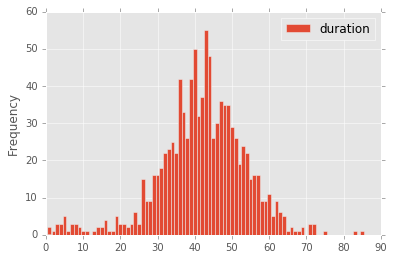

In [137]:
duration_df.plot.hist(bins=np.arange(0.5, 90.5, 1))

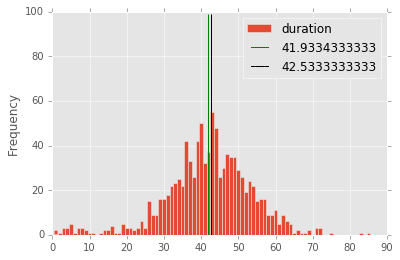

In [138]:
to_plot = duration_df.plot.hist(bins=np.arange(0.5, 90.5, 1))
ymin = 0
ymax = 100
to_plot.vlines(x=duration_df.mean(), ymin=ymin, ymax=ymax-1, color='g')
to_plot.vlines(x=duration_df.median(), ymin=ymin, ymax=ymax-1, color='k')
to_plot.legend(['duration',duration_mean[0] , duration_median[0]])

### 3.3 First-blood time

Similar to previous part, plot a histogram to show distribution of first-blood time. Also mark on the plot: the **mean** and **median**.

first_blood    2.2178
dtype: float64
first_blood    1.966667
dtype: float64


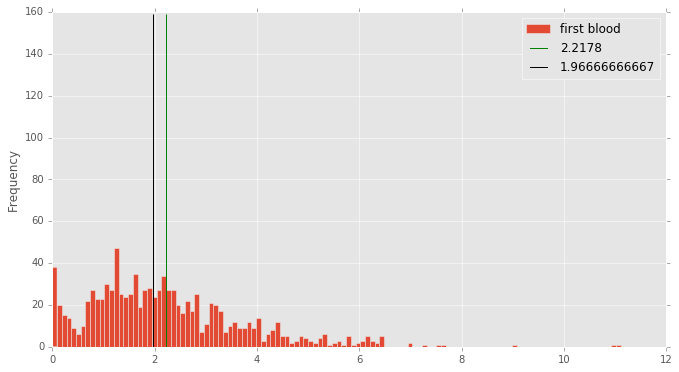

In [139]:
all_firstblood =[]
for each_duration in data:
    all_firstblood.append(each_duration['first_blood_time'])
#     print each_duration['duration']
all_firstblood = np.array(all_firstblood)/60.
firstblood_df = pd.DataFrame(all_firstblood)
firstblood_df.columns = ['first_blood']
firstblood_df['first_blood'] = firstblood_df['first_blood']
print firstblood_df.mean()
print firstblood_df.median()



to_plot = firstblood_df.plot.hist(bins=120,figsize=(11,6))
ymin = 0
ymax = 160
to_plot.vlines(x=firstblood_df.mean(), ymin=ymin, ymax=ymax-1, color='g')
to_plot.vlines(x=firstblood_df.median(), ymin=ymin, ymax=ymax-1, color='k')
to_plot.legend(['first blood',firstblood_df.mean()[0],firstblood_df.median()[0]])

### 3.4 Hero popularity and win rate

Make a stacked horizontal barchart to display the number of games played by each hero and how many of them are victories. You must sort the bar so that the most popular hero appears on top.

In [140]:
# version4
# all_heroes = df['heroes']
# print all_heroes
win_rate_df = pd.DataFrame(data)
get_hero = api.get_heroes() #use api to take all the heroes name
all_heroes = {'heroes': get_hero['heroes']}
# pprint(all_heroes)
# print heroes
all_heroes = all_heroes['heroes'] #put into the list
# print all_heroes[:2]



In [141]:
# version4.1
# get all heroes and id

all_heroes_name = {hero[u'id']: hero[u'localized_name'] for hero in all_heroes}
# print heroes_lookup
# pprint(win_rate_df['players'][1])
print all_heroes_name

{1: u'Anti-Mage', 2: u'Axe', 3: u'Bane', 4: u'Bloodseeker', 5: u'Crystal Maiden', 6: u'Drow Ranger', 7: u'Earthshaker', 8: u'Juggernaut', 9: u'Mirana', 10: u'Morphling', 11: u'Shadow Fiend', 12: u'Phantom Lancer', 13: u'Puck', 14: u'Pudge', 15: u'Razor', 16: u'Sand King', 17: u'Storm Spirit', 18: u'Sven', 19: u'Tiny', 20: u'Vengeful Spirit', 21: u'Windranger', 22: u'Zeus', 23: u'Kunkka', 25: u'Lina', 26: u'Lion', 27: u'Shadow Shaman', 28: u'Slardar', 29: u'Tidehunter', 30: u'Witch Doctor', 31: u'Lich', 32: u'Riki', 33: u'Enigma', 34: u'Tinker', 35: u'Sniper', 36: u'Necrophos', 37: u'Warlock', 38: u'Beastmaster', 39: u'Queen of Pain', 40: u'Venomancer', 41: u'Faceless Void', 42: u'Wraith King', 43: u'Death Prophet', 44: u'Phantom Assassin', 45: u'Pugna', 46: u'Templar Assassin', 47: u'Viper', 48: u'Luna', 49: u'Dragon Knight', 50: u'Dazzle', 51: u'Clockwerk', 52: u'Leshrac', 53: u"Nature's Prophet", 54: u'Lifestealer', 55: u'Dark Seer', 56: u'Clinkz', 57: u'Omniknight', 58: u'Enchantres

In [142]:
# # version4.2
heroes_choosed = {}
heroes_win = {}
for each_hero in win_rate_df.index:
    all_players = win_rate_df['players'][each_hero]
    r_win = win_rate_df['radiant_win'][each_hero]
    for each_player in all_players:
        each_id = each_player['hero_id']
        each_player_slot = each_player['player_slot']
#         print each_id , each_player_slot
        if each_player_slot < 7:
            if r_win:
            #radiant_win
                point = 1
            else:
                point = 0
        else:
            if r_win:
            #radiant_win
                point = 0
            else:
                point = 1
            #dire_win
        if each_id != 0:
            hero_name = all_heroes_name[each_id]
            heroes_choosed[hero_name] = heroes_choosed.get(hero_name, 0) + 1
            heroes_win[hero_name] = heroes_win.get(hero_name, 0) + point
            
        
# print heroes_choosed
# print'========'
# print heroes_win


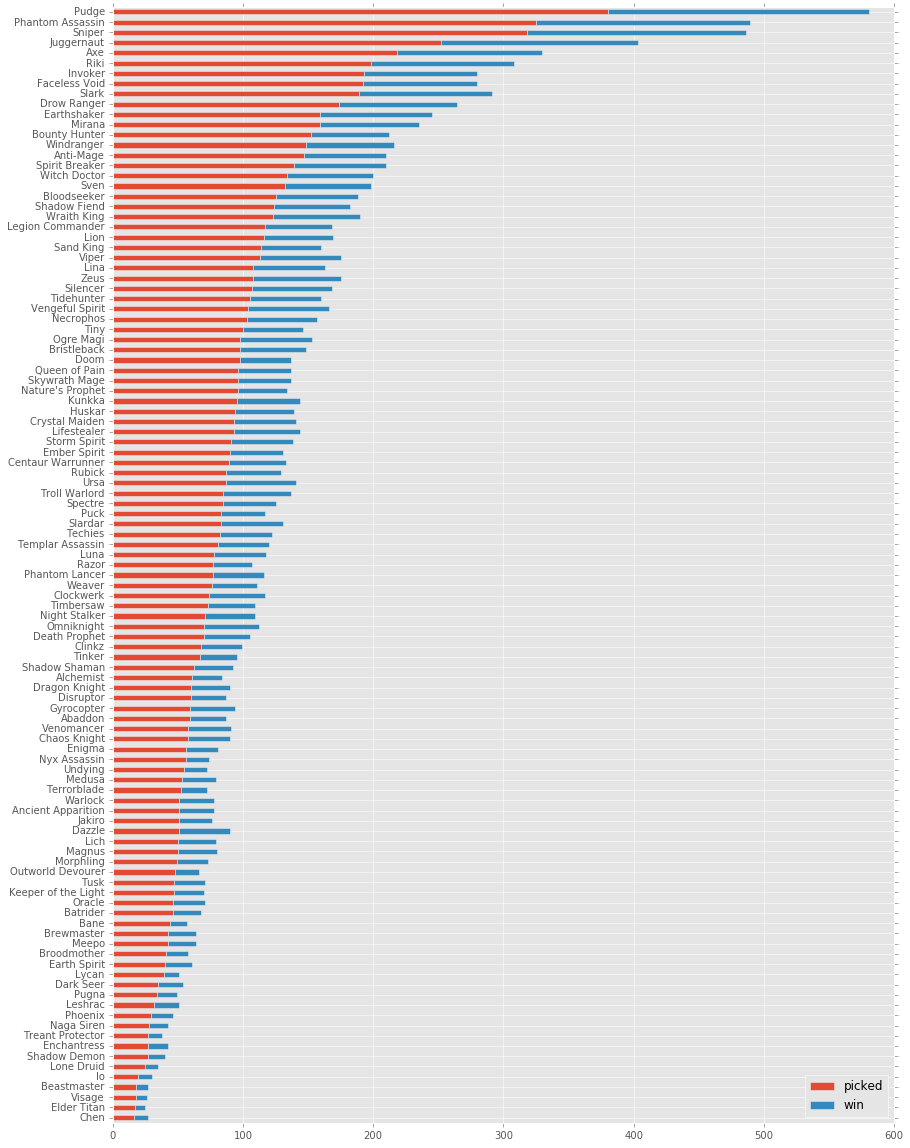

In [143]:
# version4.3
# make a dataframe by using heroes_choosed and heroes_win
all_heroes_df = pd.DataFrame([heroes_choosed, heroes_win], index=['picked','win']).T
# print all_heroes_df
# all_heroes_kda_df.sort_values(by=['kills']).plot(kind="barh",stacked=True, figsize=(14,20))

all_heroes_df.sort_values(by=['picked']).plot(kind="barh",stacked=True, figsize=(14,20))


### 3.5  Kills/Death/Assist

Make a grouped horizonal barchart to display: total kills, total deaths, total assists for each hero on the same axis.

In [144]:
kill = {}
death = {}
assist={}
kda_df = pd.DataFrame(data)

for each_hero in kda_df.index:
    all_players = kda_df['players'][each_hero]
    for each_player in all_players:
        each_id = each_player['hero_id']
        if each_id != 0:
            hero_name = all_heroes_name[each_id]
        
        #first we get the hero in the dict then we add it with the new data that come in 
        kill[hero_name] = kill.get(hero_name,0) + each_player['kills']

        death[hero_name] = death.get(hero_name,0)+ each_player['deaths']
        assist[hero_name] = assist.get(hero_name, 0)+ each_player['assists']
# print kill
# print'======'
# print death
# print'======'
# print assist


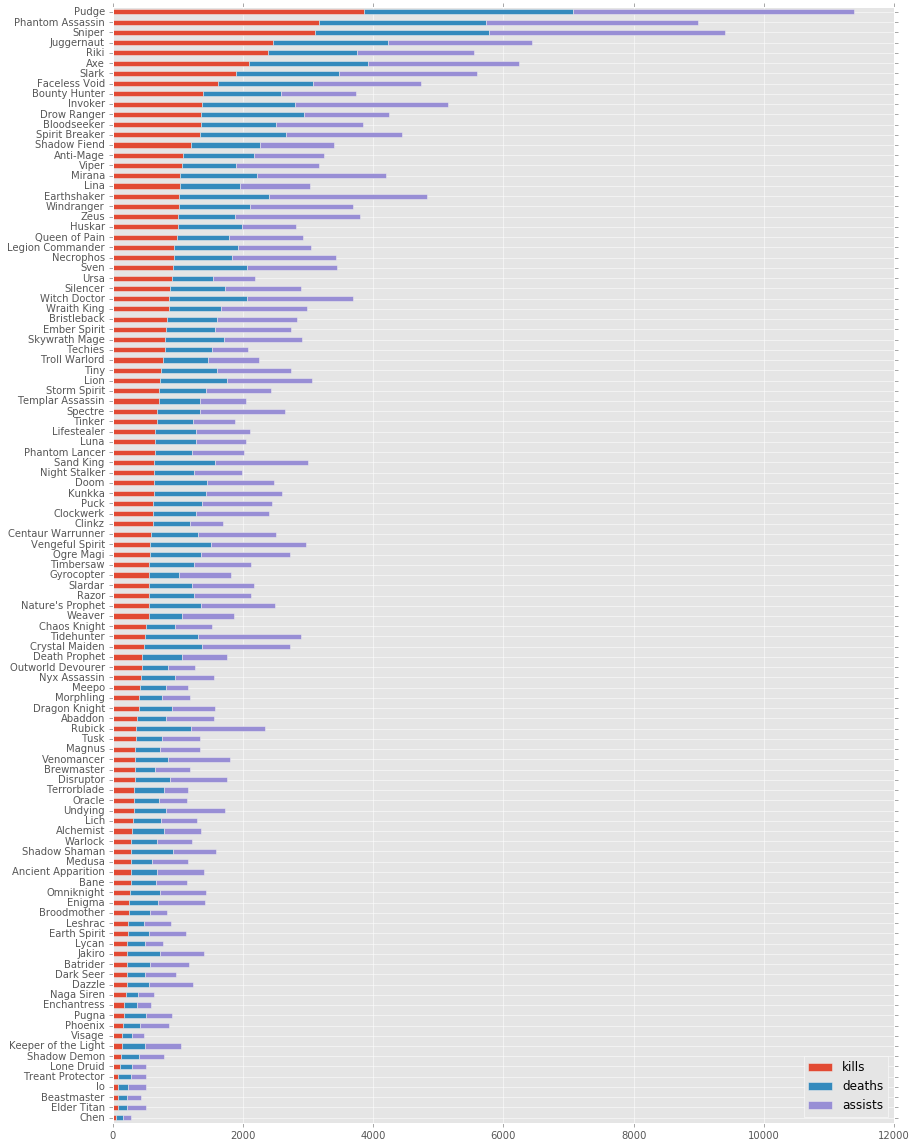

In [145]:

all_heroes_kda_df = pd.DataFrame([kill, death, assist], index=['kills','deaths', 'assists']).T

all_heroes_kda_df.sort_values(by=['kills']).plot(kind="barh",stacked=True, figsize=(14,20))


### 3.6 Richest Heros

Find out the top 10 heros with highest Gold per Minute.

In [146]:
rich_heros_df = pd.DataFrame(data)

each_hero_gold_per_min ={}


for each_hero in rich_heros_df.index:
    all_players = rich_heros_df['players'][each_hero]
    for each_player in all_players:
        each_id = each_player['hero_id']
        if each_id != 0:
            hero = all_heroes_name[each_id]
        #check that is hero is in the dict. or not
        hero_gold = each_player['gold_per_min']
#         print hero, hero_gold
        #check that is hero is in the dict. or not
        if hero in each_hero_gold_per_min:
            #if has and the gold_per_min higher than previous then change to the new on
            if hero_gold > each_hero_gold_per_min[hero]:
                each_hero_gold_per_min[hero] = hero_gold
        else:
            #add new one to dict.
            each_hero_gold_per_min[hero] = hero_gold
            
            
        
    
print each_hero_gold_per_min


{u'Razor': 599, u'Night Stalker': 642, u'Naga Siren': 1095, u'Undying': 512, u'Outworld Devourer': 704, u'Juggernaut': 827, u'Ursa': 744, u'Gyrocopter': 842, u'Venomancer': 861, u'Tinker': 785, u'Ancient Apparition': 437, u'Omniknight': 561, u'Chaos Knight': 701, u'Dragon Knight': 613, u'Abaddon': 632, u'Faceless Void': 878, u'Mirana': 674, u'Bristleback': 706, u'Elder Titan': 502, u'Slardar': 635, u'Pudge': 997, u'Templar Assassin': 985, u'Shadow Demon': 461, u'Anti-Mage': 880, u'Keeper of the Light': 495, u'Necrophos': 692, u'Techies': 736, u'Medusa': 729, u'Lone Druid': 770, u'Phantom Lancer': 671, u'Tiny': 717, u'Riki': 766, u'Invoker': 754, u'Sniper': 962, u'Meepo': 821, u'Leshrac': 619, u'Zeus': 694, u'Silencer': 672, u'Broodmother': 907, u'Enigma': 691, u'Doom': 744, u'Lina': 655, u'Bane': 571, u'Alchemist': 876, u'Batrider': 480, u'Brewmaster': 653, u'Axe': 750, u'Skywrath Mage': 605, u'Lifestealer': 720, u'Pugna': 449, u'Enchantress': 512, u'Death Prophet': 617, u'Lion': 780, 

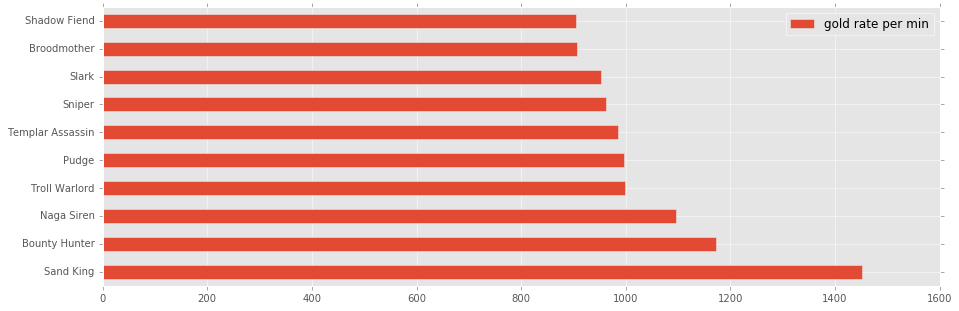

In [147]:
all_heroes_kda_df = pd.DataFrame([each_hero_gold_per_min], index=['gold rate per min',]).T

all_heroes_kda_df.sort_values(by=['gold rate per min'],ascending=False)[:10].plot(kind="barh",stacked=True, figsize=(15,5))

### 3.6 Popular Items (overall)

Find out the top 10 items that most frequently used overall.

In [148]:
# Fill code here
#use api to get the item data

all_items = api.get_game_items()
# print all_items

all_items = all_items['items']
# print all_items
items_df = pd.DataFrame(data)


In [149]:
all_items_data = {item['id']: item['localized_name'] for item in all_items}
# print all_items_data

top_ten_items = {}

#first we loop all the data and take the index
for each_hero in items_df.index:
    #all_players is to get players in  match detail
    all_players = items_df['players'][each_hero]
    #then we loop to get each player in each match
    for each_player in all_players:
        #get each player id
        each_id = each_player['hero_id']
        #then we loop 0-6 for item
        for i in range(0,6):
            #set the val itme
            item = each_player['item_'+ str(i) ]
            try:
                #take the item id and get the name
                item_data = all_items_data[item]
                #then check the name in the list if have +1 if not add one
                top_ten_items[item_data] = top_ten_items.get(item_data, 0) + 1
            except:
                pass
            
            
# print top_ten_items


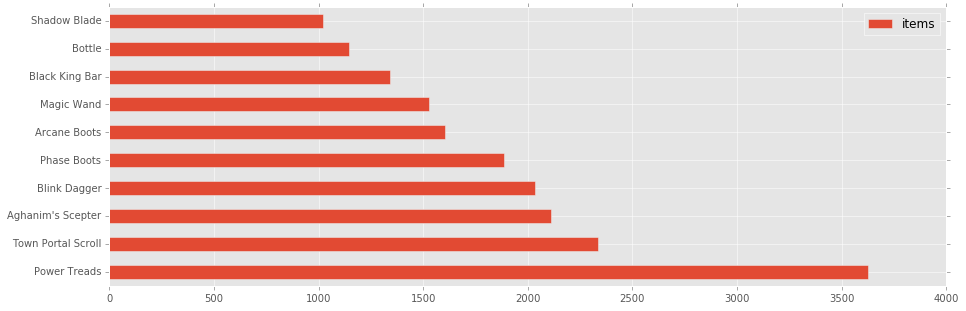

In [150]:
all_items_kda_df = pd.DataFrame([top_ten_items], index=['items',]).T

all_items_kda_df.sort_values(by=['items'],ascending=False)[:10].plot(kind="barh",stacked=True, figsize=(15,5))

### 3.7 Popular Items (among winners)

Find out the top 10 items that most frequently used among the winning team. 

In [151]:
# Fill code here


radiant_items = {}
dire_items = {}
for each_hero in win_rate_df.index:
    all_players = win_rate_df['players'][each_hero]
    r_win = win_rate_df['radiant_win'][each_hero]
    for each_player in all_players:
        each_id = each_player['hero_id']
        each_player_slot = each_player['player_slot']
        for i in range(0,6):
            #set the val itme
            item = each_player['item_'+ str(i) ]
            try:
                #take the item id and get the name
                item_data = all_items_data[item]
                #then check the name in the list if have +1 if not add one
                if each_player_slot < 7:
                    if r_win:
                    #radiant_win
                        radiant_items[item_data] = radiant_items.get(item_data, 0) + 1
                    else:
                        radiant_items[item_data] = radiant_items.get(item_data, 0)
                else:
                    if r_win:
                        dire_items[item_data] = dire_items.get(item_data, 0) 
                    else:
                        dire_items[item_data] = dire_items.get(item_data, 0)  + 1
                    #dire_win
            except:
                pass
            
            
print radiant_items
print dire_items


{u'Recipe: Manta Style': 1, u'Power Treads': 976, u'Skull Basher': 150, u'Platemail': 49, u'Cloak': 6, u'Tango': 52, u'Black King Bar': 384, u'Gem of True Sight': 90, u'Reaver': 51, u'Tranquil Boots': 259, u'Recipe: Daedalus': 1, u'Chainmail': 10, u'Ring of Regen': 13, u'Mjollnir': 139, u'Blade Mail': 200, u"Aghanim's Scepter": 712, u'Tango (Shared)': 2, u'Blades of Attack': 7, u'Stout Shield': 85, u'Recipe: Desolator': 1, u'Phase Boots': 484, u'Gauntlets of Strength': 31, u'Perseverance': 74, u'Point Booster': 78, u'Pipe of Insight': 65, u'Armlet of Mordiggian': 83, u'Dust of Appearance': 65, u'Recipe: Force Staff': 0, u'Vitality Booster': 31, u'Headdress': 13, u"Eul's Scepter of Divinity": 151, u"Linken's Sphere": 109, u'Robe of the Magi': 8, u"Recipe: Eul's Scepter of Divinity": 2, u'Oblivion Staff': 29, u'Bracer': 87, u'Daedalus': 215, u'Ogre Club': 57, u'Force Staff': 230, u"Heaven's Halberd": 40, u'Recipe: Mjollnir': 4, u'Butterfly': 137, u'Quelling Blade': 49, u'Eaglesong': 29, 

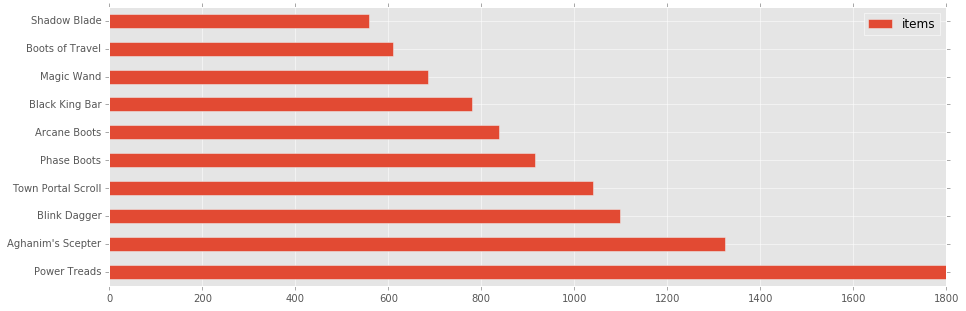

In [152]:
all_items = dict(Counter(radiant_items) + Counter(dire_items))
# print all_items
all_items_df = pd.DataFrame([all_items], index=['items',]).T

all_items_df.sort_values(by=['items'],ascending=False)[:10].plot(kind="barh",stacked=True, figsize=(15,5))



### 3.8 Hero and items

Pick 3 heros of your choice. Find out the most commonly purchased items for them. Are the items similar or different between the victors and losers? You can figure out this by finding the items for victors and for losers separately and compare them.

In [153]:
# Fill code here

get_hero = api.get_heroes() #use api to take all the heroes name
all_heroes = {'heroes': get_hero['heroes']}
all_heroes = all_heroes['heroes']
all_heroes_name = {hero[u'id']: hero[u'localized_name'] for hero in all_heroes}
all_heros_id = all_heroes_name.keys()
three_team = [np.random.choice(all_heros_id) for _ in range(3)]
print three_team


[70, 28, 89]


In [154]:
win_team = {}
lose_team = {}



for each_hero in win_rate_df.index:
    all_players = win_rate_df['players'][each_hero]
    r_win = win_rate_df['radiant_win'][each_hero]
    for each_player in all_players:
        each_id = each_player['hero_id']
        if each_id in three_team:
            try:
                hero_name = all_heroes_name[each_id]
            except:
                pass
            each_player_slot = each_player['player_slot']
            for i in range(6):
                #set the val itme
                item = each_player['item_'+ str(i) ]
                try:
                    #take the item id and get the name
                    item_data = all_items_data[item]
                    win_itme = win_team.get(item_data, 0)
                    lose_item = lose_team.get(item_data, 0)
                    #then check the name in the list if have +1 if not add one
                    if each_player_slot < 7:
                        if r_win:
                        #radiant_win
                            win_team[item_data] = win_itme + 1
                            lose_team[item_data] = lose_item
                        else:
                            win_team[item_data] = win_itme
                            lose_team[item_data] = lose_item + 1
                    else:
                        if r_win:
                            win_team[item_data] = win_itme 
                            lose_team[item_data] = lose_item +1
                        else:
                        #dire_win
                            win_team[item_data] = win_itme + 1
                            lose_team[item_data] = lose_item
                except:
                    pass
           

            
print win_team
print lose_team

{u'Power Treads': 53, u'Skull Basher': 22, u'Platemail': 2, u'Tango': 2, u'Black King Bar': 29, u'Gem of True Sight': 3, u'Reaver': 3, u'Tranquil Boots': 2, u'Chainmail': 0, u'Ring of Regen': 1, u'Mjollnir': 4, u'Blade Mail': 12, u"Aghanim's Scepter": 0, u'Blades of Attack': 1, u'Stout Shield': 9, u'Phase Boots': 42, u'Gauntlets of Strength': 1, u'Perseverance': 2, u'Point Booster': 1, u'Armlet of Mordiggian': 12, u'Dust of Appearance': 2, u'Vitality Booster': 3, u"Linken's Sphere": 3, u'Robe of the Magi': 0, u'Bracer': 5, u'Daedalus': 5, u'Ogre Club': 2, u'Claymore': 1, u"Heaven's Halberd": 1, u'Butterfly': 4, u'Quelling Blade': 3, u'Abyssal Blade': 8, u'Battle Fury': 4, u'Hood of Defiance': 1, u'Sentry Ward': 0, u'Monkey King Bar': 1, u'Ring of Protection': 0, u'Hand of Midas': 1, u'Helm of the Dominator': 5, u'Magic Wand': 16, u'Urn of Shadows': 5, u'Healing Salve': 1, u'Crimson Guard': 5, u"Vladmir's Offering": 46, u'Ring of Basilius': 0, u'Javelin': 1, u'Eye of Skadi': 6, u'Ultima

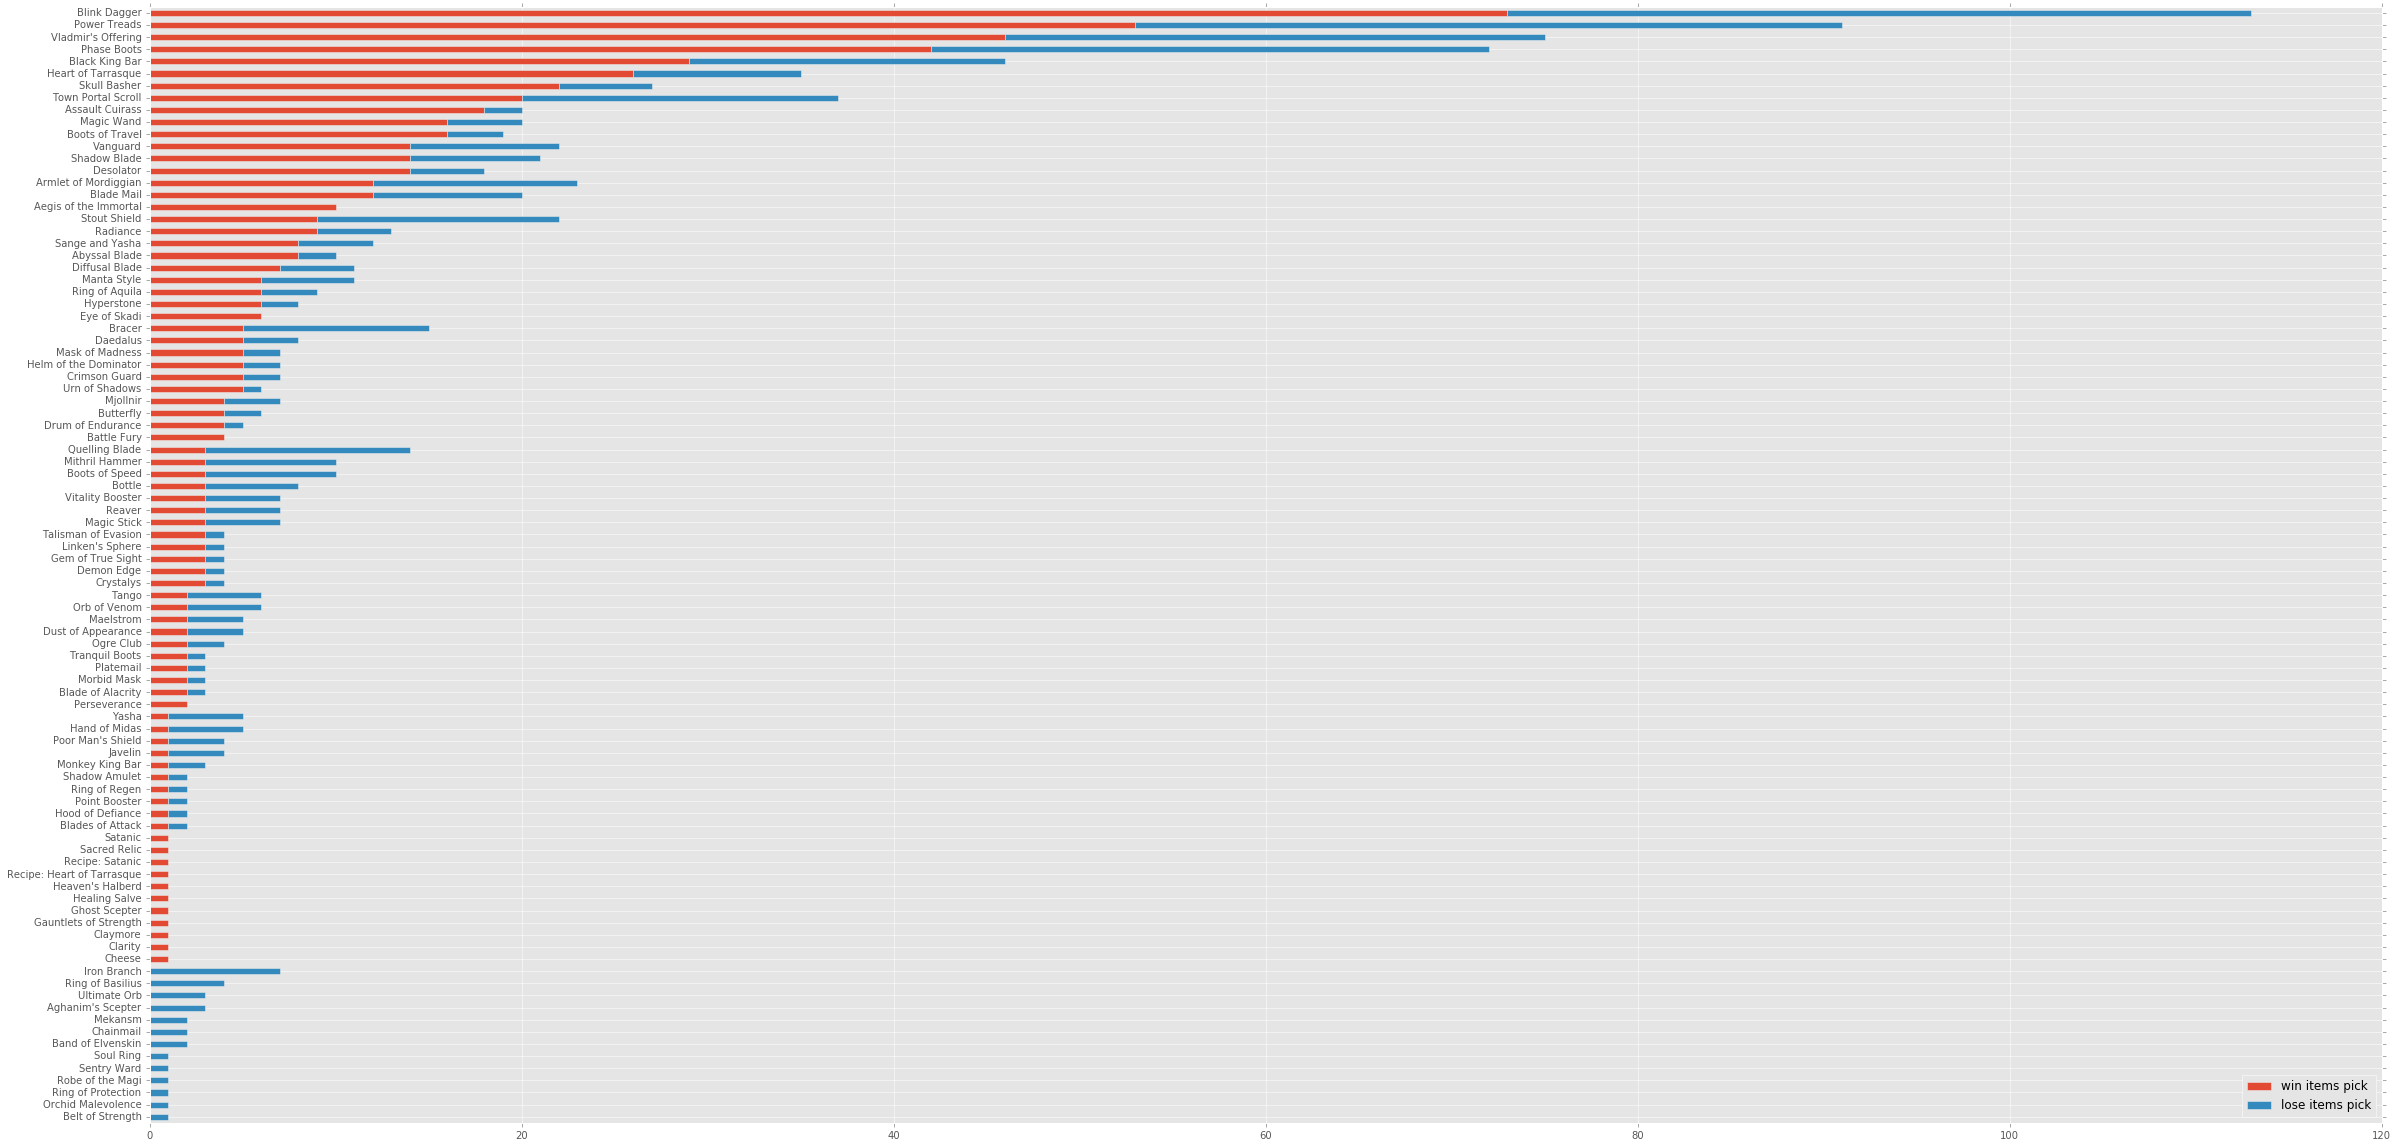

In [156]:
items_pick_df = pd.DataFrame([win_team, lose_team],index=['win items pick', 'lose items pick']).T
items_pick_df.sort_values(by=['win items pick', 'lose items pick'],).plot(kind="barh",stacked=True, figsize=(40,20))




### 3.9 Your pick!

Come up with a question of your own and find the answer from the dataset.

I just want to know the sven's lists of item that the players who play in the tournament choose

In [159]:
# Fill code here
#use api to get the item data
data = pickle.load( open( "doat_details.p", "rb" ) )

all_items = api.get_game_items()
# print all_items

all_items = all_items['items']
# print all_items
items_df = pd.DataFrame(data)
all_items_data = {item['id']: item['localized_name'] for item in all_items}

win_rate_df = pd.DataFrame(data)



In [160]:
# Fill code here

sven_count =0
sven_radiant_items_win = {}
sven_dire_items_win ={}
all_sven_item ={}

for each_hero in win_rate_df.index:
    all_players = win_rate_df['players'][each_hero]
    r_win = win_rate_df['radiant_win'][each_hero]
    for each_player in all_players:
        if each_id != 0:
            each_id = each_player['hero_id']
            hero_name = all_heroes_name[each_id]
#         print each_id
#         print hero_name
        if hero_name == "Sven":
            sven_count+=1
            for i in range(0,6):
            #set the val itme
                
                item = each_player['item_'+ str(i) ]
                try:
                    #take the item id and get the name
                    item_data = all_items_data[item]
#                     print item_data
                    all_sven_item[item_data] = all_sven_item.get(item_data, 0) + 1
                    #then check the name in the list if have +1 if not add one
                    
                except:
                    pass


print sven_count

print all_sven_item
# print radiant_items
# print dire_items


9824
{u'Recipe: Manta Style': 3, u'Power Treads': 3626, u'Skull Basher': 531, u'Platemail': 205, u'Cloak': 42, u'Tango': 290, u'Black King Bar': 1339, u'Recipe: Medallion of Courage': 1, u'Gem of True Sight': 226, u'Reaver': 157, u'Tranquil Boots': 974, u'Recipe: Daedalus': 3, u'Chainmail': 80, u'Ring of Regen': 67, u'Recipe: Pipe of Insight': 1, u'Mjollnir': 402, u'Blade Mail': 802, u"Aghanim's Scepter": 2110, u'Tango (Shared)': 8, u'Blades of Attack': 55, u'Stout Shield': 412, u'Recipe: Desolator': 6, u'Phase Boots': 1886, u'Gauntlets of Strength': 91, u'Perseverance': 213, u'Point Booster': 283, u'Pipe of Insight': 190, u'Armlet of Mordiggian': 313, u'Dust of Appearance': 400, u'Recipe: Force Staff': 4, u'Vitality Booster': 150, u'Diffusal Blade': 237, u"Eul's Scepter of Divinity": 507, u"Linken's Sphere": 312, u'Robe of the Magi': 54, u"Recipe: Eul's Scepter of Divinity": 7, u'Oblivion Staff': 92, u'Bracer': 476, u'Daedalus': 573, u'Ogre Club': 438, u'Force Staff': 781, u"Heaven's 

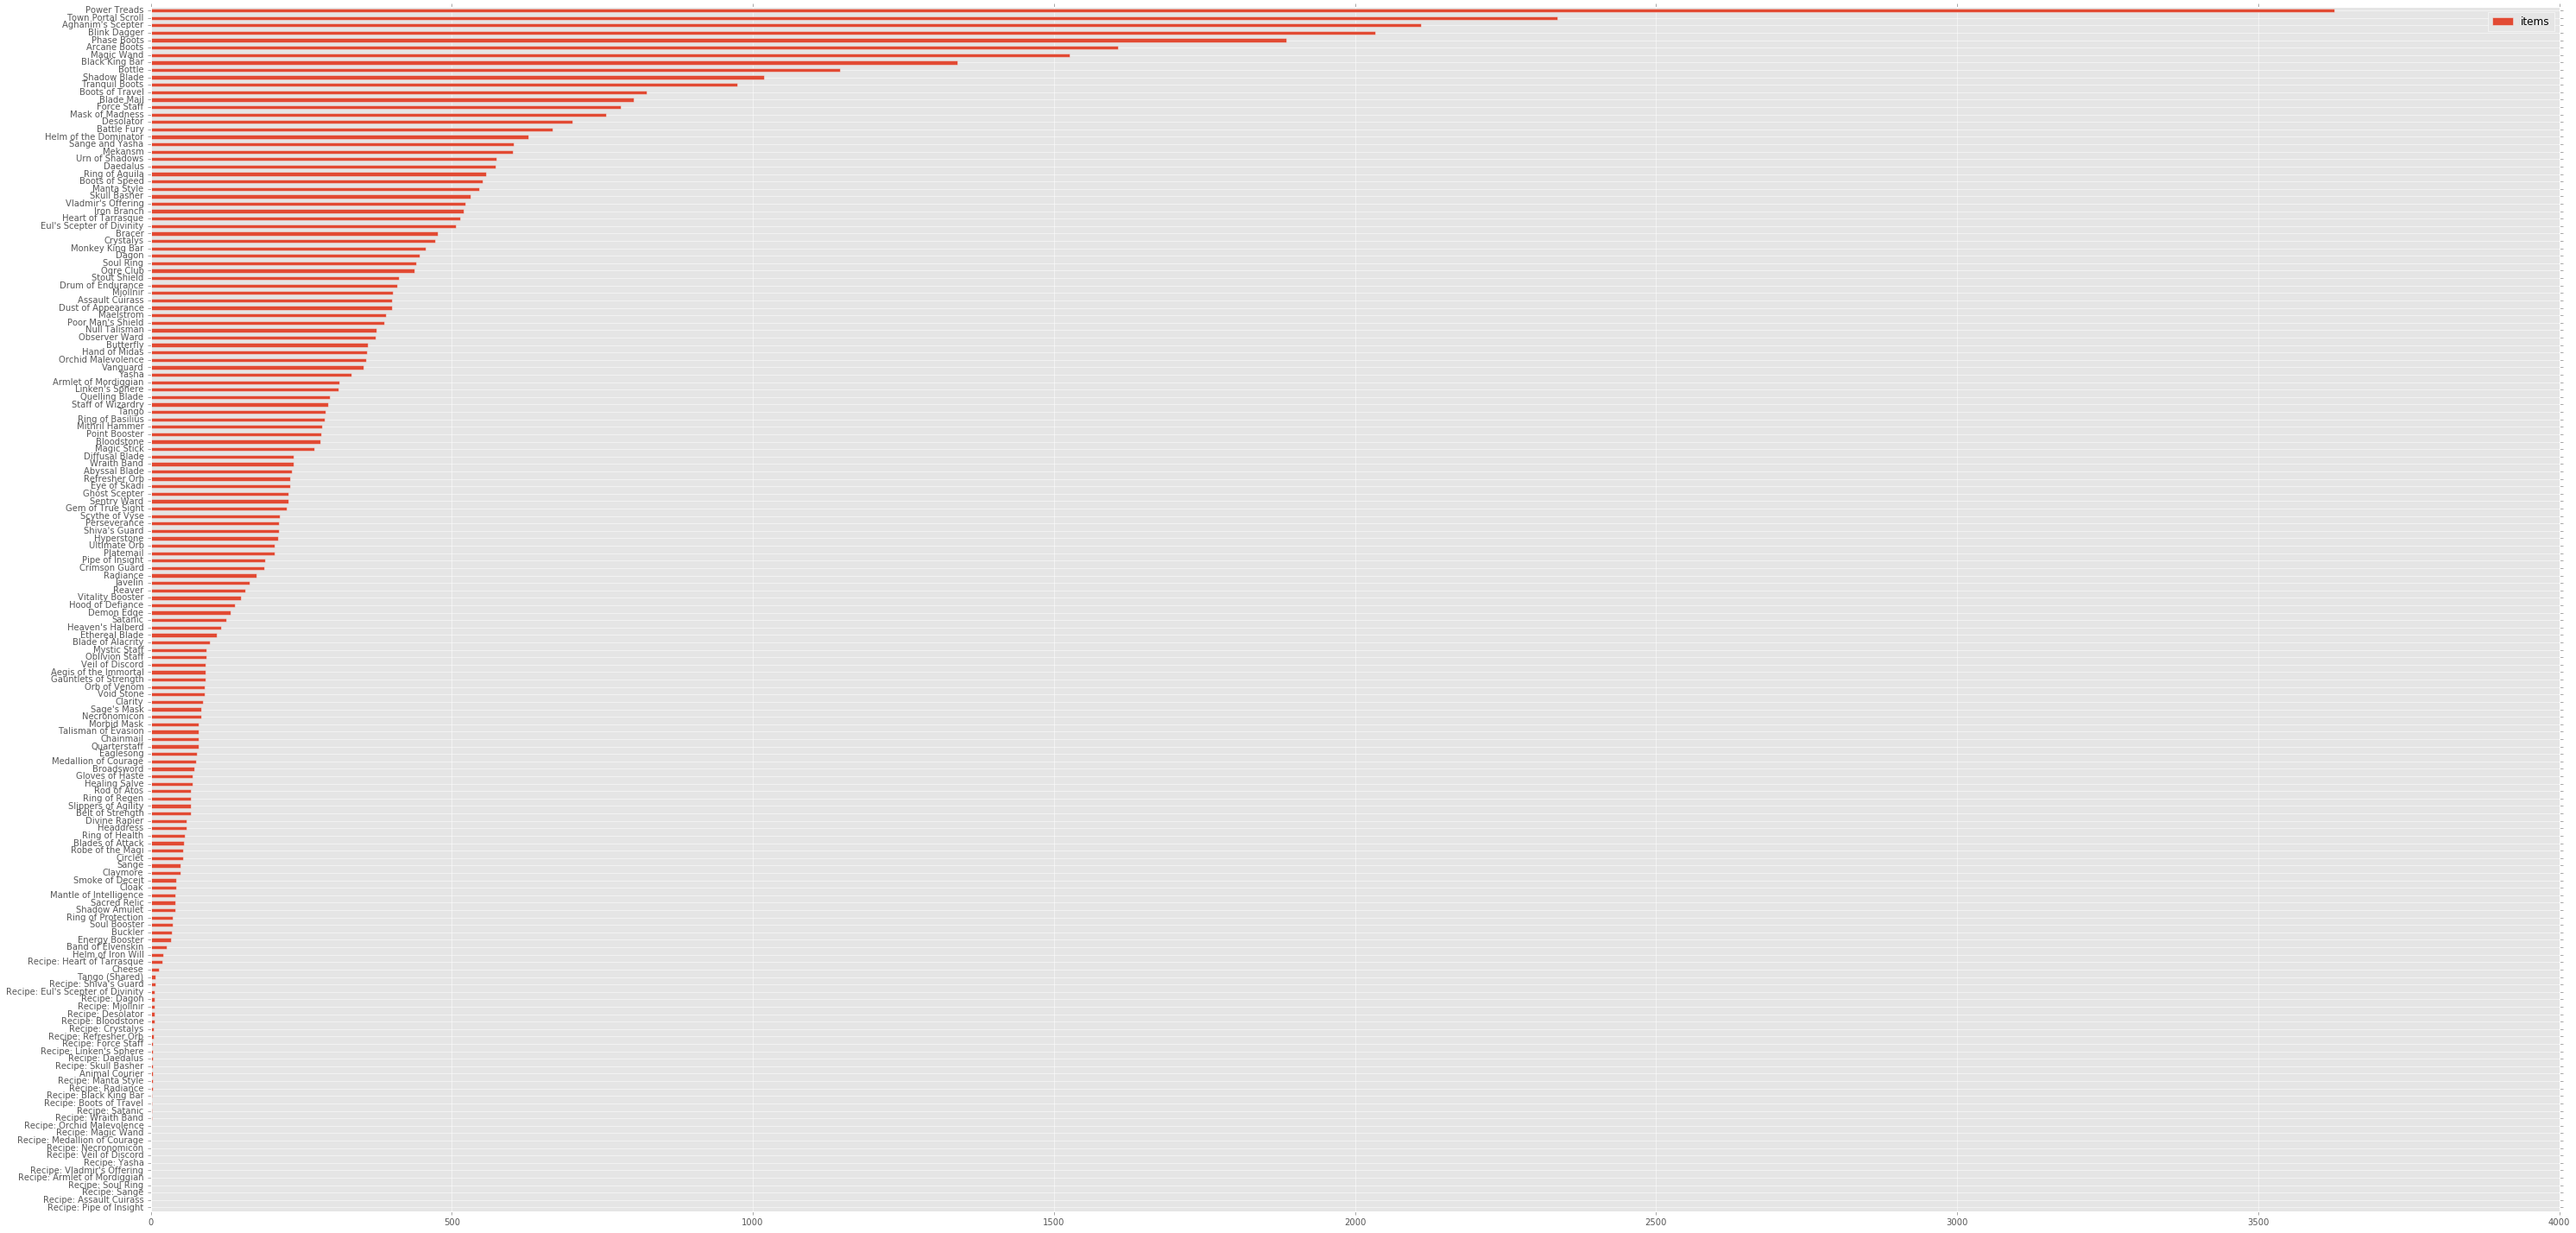

In [161]:
all_items = dict(Counter(sven_radiant_items_win) + Counter(sven_dire_items_win))
# print all_items
all_items_df = pd.DataFrame([all_sven_item], index=['items',]).T

all_items_df.sort_values(by=['items'],).plot(kind="barh",stacked=True, figsize=(50,25))
plt.figure()


